Shannon Moran <br>
Phys 514 <br>
HW 5<br>
Due: Oct 19

## Import required packages

In [1]:
%matplotlib inline
import numpy as np
from math import *
import matplotlib.pyplot as plt

## Initialize percolation lattice

Make a square lattice and set the elements of the lattice to 1 with probability $p$ and to 0 with probability $1−p)$.

In [2]:
def init_lattice(L,p):
    random_lattice = np.random.random((L,L))
    lattice = (random_lattice<=p)*1
    return lattice

## Cluster identification

Identify all clusters on the lattice (i.e. all connected sites set to 1) using the Hoshen Kopelman algorithm. Choose $p\approx0.58$ on a large lattice and make a plot, coloring the different clusters.

Assumptions for the Hoshen Kopelman algorithm:
* No periodic boundary conditions
* Neighbors are only those cells connected by an edge

In [3]:
def get_neighbors(i,j,clusterIDs,neighborIDs):
    neighborIDs.append(clusterIDs[i][j])
    if i!=0:
        neighborIDs.append(clusterIDs[i-1][j])
    if j!=0:
        neighborIDs.append(clusterIDs[i][j-1])
    if i<(clusterIDs.shape[0]-1):
        neighborIDs.append(clusterIDs[i+1][j])
    if j<(clusterIDs.shape[1]-1):
        neighborIDs.append(clusterIDs[i][j+1])
    return neighborIDs

def ID_proper(i,j,clusterIDs):
    global changes
    neighborIDs = get_neighbors(i,j,clusterIDs,[])
    
    # 1) if no neighbors are in a cluster, then keep particle in its own cluster
    if clusterIDs[i][j]==0: siteID = 0 
    elif np.amax(neighborIDs)==0:
        siteID = clusterIDs[i][j]
        
    # 2) if more than one neighboring site is occupied, take the smallest of the neighbor labels
    else:
        nonzero_labels = [x for x in neighborIDs if x>0]
        if clusterIDs[i][j]!=np.amin(np.asarray(nonzero_labels)): changes+=1
        siteID = np.amin(np.asarray(nonzero_labels))
    return siteID

def HK_algorithm(lattice,verbose=False):
    ## 1) Find unique ID for each site
    L = lattice.shape[0]
    clusterIDs = np.copy(np.zeros((L,L)))
    np.place(clusterIDs,lattice==0,0)
    np.place(clusterIDs,lattice==1,np.arange(1,L**2))

    # Stores number of unique clusters
    clusters0 = np.unique(clusterIDs).shape[0]-1

    ## 2) Replace unique cluster IDs with proper cluster labels
    # Note that I run a few loops of this until no values change
    global changes
    changes = 1
    loops = 0
    while changes>0:
        changes = 0
        for i in range(clusterIDs.shape[0]):
            for j in range(clusterIDs.shape[1]):
                clusterIDs[i][j] = ID_proper(i,j,clusterIDs)
        loops +=1
    
    # Print out the results of the consolidation loops
    #clustersF = np.unique(clusterIDs).shape[0]-1
    
    if verbose==True:
        print('Number of unique clusters on first pass: %s'%clusters0)    
        print('Number of unique clusters after %s consolidation loops: %s'%(loops,np.unique(clusterIDs).shape[0]-1))

    # Here, I just rescale the label values for ease of visualization
    labels = np.unique(clusterIDs)
    for k in range(len(labels)):
        if k==0: pass
        else: np.place(clusterIDs,clusterIDs==labels[k],k)
    return clusterIDs

In [4]:
# Generate test lattice
p = 0.58
L = 12
lattice = init_lattice(L,p)

# Check that L is large enough that the number of filled lattice sites has converged to p
print('Percentage of lattice sites filled: %f' %(np.sum(lattice)/L**2))

Percentage of lattice sites filled: 0.631944


Number of unique clusters on first pass: 91
Number of unique clusters after 10 consolidation loops: 8


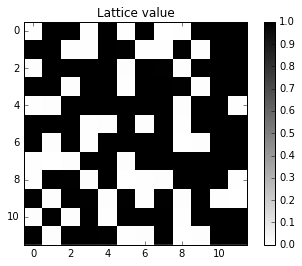

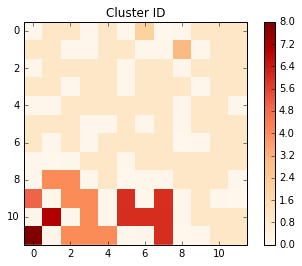

Cluster IDs, for visual verification
[[ 0.  1.  1.  0.  1.  0.  2.  0.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.  0.  0.  3.  0.  1.  1.]
 [ 0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.]
 [ 1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.]
 [ 1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  4.  4.  0.  1.  0.  0.  0.  1.  1.  1.  0.]
 [ 5.  0.  4.  4.  0.  6.  0.  6.  0.  1.  0.  0.]
 [ 0.  7.  0.  4.  0.  6.  6.  6.  0.  1.  1.  1.]
 [ 8.  0.  4.  4.  4.  0.  0.  6.  0.  0.  1.  1.]]


In [5]:
clusterIDs = HK_algorithm(lattice,verbose=True)
        
plt.imshow(lattice,cmap='binary',interpolation="none")
plt.title('Lattice value')
plt.colorbar()
plt.show()

plt.imshow(clusterIDs,cmap='OrRd',interpolation="none")
plt.title('Cluster ID')
plt.colorbar()
plt.show()

print('Cluster IDs, for visual verification')
print(clusterIDs)

## Studying percolating clusters

Compute the probability P of having a percolating cluster (one that has an element both on the bottom and on the top row of your lattice) as a function of p, make a plot of P(p), and send plot, code, and descriptions to Canvas.

In [6]:
def percolation_check(clusterIDs):
    clusters = np.unique(clusterIDs)
    # Screens out edge case where there are no empty sites
    a=(0 if clusters[0]==1 else 1)
    for c in clusters[a:]:
        check = np.copy(np.where(clusterIDs==c))
        if (np.amin(check[0])==0 and np.amax(check[0])==(L-1)): 
            return 1
        else: pass
    return 0

In [7]:
L = 25
reps = 5

probs = np.linspace(0.0, 1.0, 20)
Probs = [] 
for p in probs:
    data = []
    for rep in range(reps):
        lattice = init_lattice(L,p)
        clusterIDs = HK_algorithm(lattice)
        data.append(percolation_check(clusterIDs))
    Probs.append(np.sum(np.asarray(data))/reps)

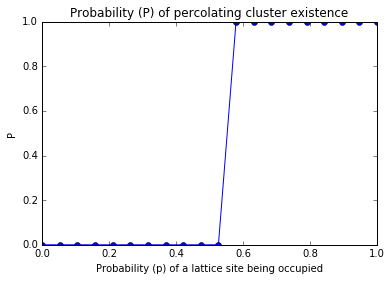

In [8]:
plt.plot(probs,Probs,'bo-')
plt.title('Probability (P) of percolating cluster existence')
plt.ylabel('P')
plt.xlabel('Probability (p) of a lattice site being occupied')
plt.show()

From this, it's fairly clear that that critical probability for percolation (defined here has spanning the box top-to-bottom) is somewhere between 0.5-0.7. Zooming in on that region...

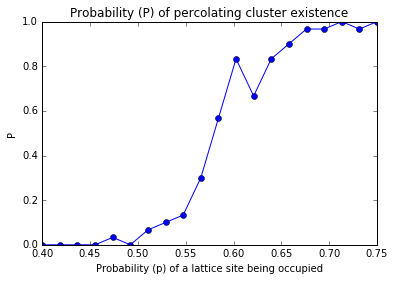

In [10]:
probs = np.linspace(0.4, 0.75, 20)
Probs = [] 

reps = 30
for p in probs:
    data = []
    for rep in range(reps):
        lattice = init_lattice(L,p)
        clusterIDs = HK_algorithm(lattice)
        data.append(percolation_check(clusterIDs))
    Probs.append(np.sum(np.asarray(data))/reps)
    
plt.plot(probs,Probs,'bo-')
plt.title('Probability (P) of percolating cluster existence')
plt.ylabel('P')
plt.xlabel('Probability (p) of a lattice site being occupied')
plt.show()

Interestly, the $p\approx0.58$ recommended in the problem statement as a test case lies right around P=0.5. It's like it was planned or something!